## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_df = pd.DataFrame(mouse_metadata)
results_df = pd.DataFrame(study_results)
study_data_complete = pd.merge(metadata_df,results_df,on="Mouse ID")
study_data_complete.head()

#Data Observations
#1. Based on the Time vs. Tumor Volume for Mouse ID = s185 graph,
#Capomulin appears to shrink the size of tumor growth.

#2 Capomulin Ramicane had the lowest average tumor volumes at the
#completion of the mice study. and are therefore the most effective 
#drugs tested in the study at reducing tumor volume. 

#3 Ramicane and then Capomulin had the lowest STD on their 
#Tumor Volume Regimens, and a low standard deviation shows that 
#the data are clustered closely around the mean (and more reliable). 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame
number_of_mice = len(study_data_complete["Mouse ID"].unique())
print(number_of_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = len(clean_study_data_complete["Mouse ID"].unique())
print(clean_number_of_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#create empty dataframe
summary_df = pd.DataFrame()

#Find mean of Tumor Volume on dataframe grouped "Drug Regimen" and add to empty summary_df dataframe
group_mean = clean_study_data_complete.groupby(["Drug Regimen"]).mean()
mean = group_mean["Tumor Volume (mm3)"]

summary_df["Mean"] = mean
summary_df

#Find median of Tumor Volume on dataframe grouped "Drug Regimen" and add to summary_df dataframe
group_median = clean_study_data_complete.groupby(["Drug Regimen"]).median()
median = group_median["Tumor Volume (mm3)"]

summary_df["Median"] = median
summary_df

#Find variance of Tumor Volume on dataframe grouped "Drug Regimen" and add to summary_df dataframe
group_variance = clean_study_data_complete.groupby(["Drug Regimen"]).var()
variance = group_variance["Tumor Volume (mm3)"]

summary_df["Variance"] = variance
summary_df

#Find standard deviation of Tumor Volume on dataframe grouped "Drug Regimen" and add to summary_df dataframe
group_std = clean_study_data_complete.groupby(["Drug Regimen"]).std()
std = group_std["Tumor Volume (mm3)"]

summary_df["Standard Deviation"] = std
summary_df

#Find standard error of mean of Tumor Volume on dataframe grouped "Drug Regimen" and add to summary_df dataframe
group_sem = clean_study_data_complete.groupby(["Drug Regimen"]).sem()
sem = group_sem["Tumor Volume (mm3)"]

summary_df["SEM"] = sem
summary_df

#add prefix to all colums for clarity
summary_df.add_prefix('Tumor Volume (mm3): ')

,Tumor Volume (mm3): Mean,Tumor Volume (mm3): Median,Tumor Volume (mm3): Variance,Tumor Volume (mm3): Standard Deviation,Tumor Volume (mm3): SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0.5, 1.0, 'Number of Mice per Treatment for each Regimen')

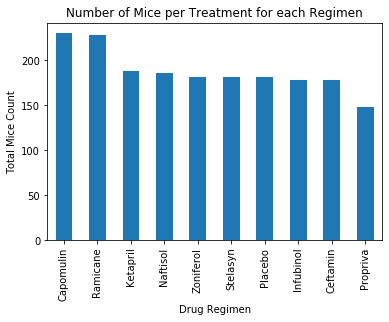

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas
total_mice = clean_study_data_complete["Drug Regimen"].value_counts()
total_mice.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel ("Total Mice Count")
plt.title("Number of Mice per Treatment for each Regimen")

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


Text(0.5, 1.0, 'Number of Mice per Treatment for each Regimen')

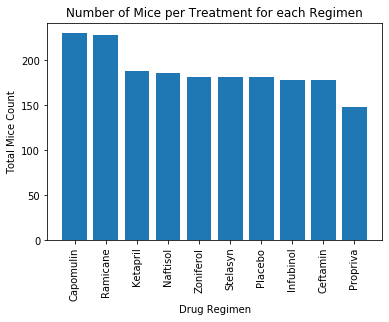

In [9]:
#Generate a bar plot using Matplotlib's `pyplot` that shows  the number of mice per time point for each treatment regimen throughout the course of the study.
total_mice = clean_study_data_complete["Drug Regimen"].value_counts()
#print(total_mice)
plt.bar(total_mice.index.values,total_mice.values)
plt.xlabel("Drug Regimen")
plt.ylabel ("Total Mice Count")
plt.xticks(rotation=90)
plt.title("Number of Mice per Treatment for each Regimen")

## Pie Plots

Male      958
Female    922
Name: Sex, dtype: int64


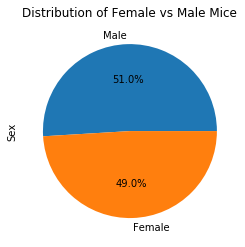

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_mice = clean_study_data_complete["Sex"].value_counts()
print(total_mice)
total_mice.plot(kind='pie',autopct="%1.1f%%",title="Distribution of Female vs Male Mice")

#doing value counts again, but looking at sex

Male      958
Female    922
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Distribution of Female vs Maile Mice')

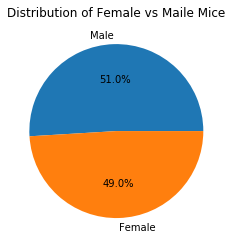

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
total_mice = clean_study_data_complete["Sex"].value_counts()
print(total_mice)
labels=total_mice.index.values
sizes =total_mice.values
plt.pie(sizes, labels=labels,autopct="%1.1f%%")
plt.title("Distribution of Female vs Maile Mice")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
data = []
total_volume_df = clean_study_data_complete.set_index(["Drug Regimen","Timepoint"]).sort_index()

for i in drugs:
    
    volume_totals = total_volume_df.loc[i,45]["Tumor Volume (mm3)"]
    #print(f"The final tumore volume of each mouse in the {i} treatment are: \n\n {volume_totals.values} \n")
    data.append(volume_totals)
    #Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    quartiles = volume_totals.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {i} is: {lowerq}")
    print(f"The upper quartile of {i} is: {upperq}")
    print(f"The interquartile range of {i} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("---------------")
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------
The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
---------------
The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.
---------------
The lower quartile of Ceftamin is: 61.43389223
The upper quartile of Ceftamin is: 67.52748237
The interquartile range of Ceftamin is: 6.093590140000003
Values below 52.2935070199999

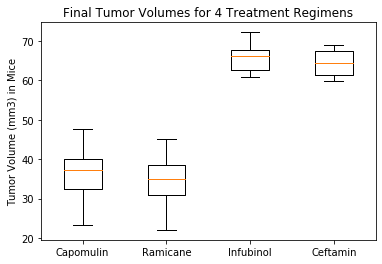

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(data)
ax1.set_title('Final Tumor Volumes for 4 Treatment Regimens')
ax1.set_ylabel("Tumor Volume (mm3) in Mice")
plt.xticks([1,2,3,4],drugs)
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Time vs. Tumor Volume for Mouse ID = s185')

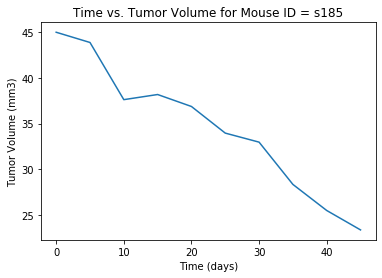

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean_study_data_complete = clean_study_data_complete[clean_study_data_complete["Drug Regimen"]=="Capomulin"]
mouse_df = clean_study_data_complete.set_index("Timepoint")
s185 = mouse_df[mouse_df["Mouse ID"]=="s185"]
#print(s185)

plt.plot(s185["Tumor Volume (mm3)"])
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time vs. Tumor Volume for Mouse ID = s185")

Text(0.5, 0, 'Mouse Weight (g)')

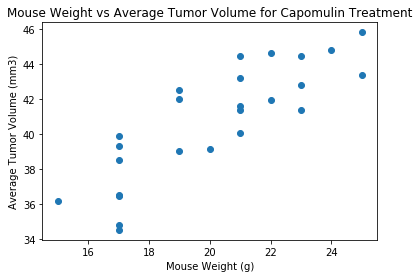

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_df= clean_study_data_complete.groupby(["Mouse ID"]).mean()
mouse_weight_df

plt.scatter(mouse_weight_df["Weight (g)"],mouse_weight_df["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Treatment")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

## Correlation and Regression

The r-squared is: 0.7088568047708717


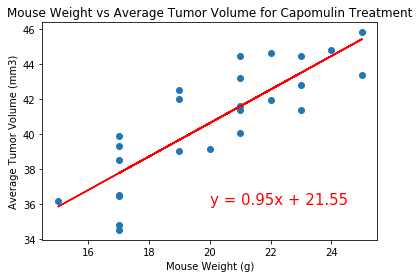

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#regression - google what it means/regression in Pandas
mouse_weight_df= clean_study_data_complete.groupby(["Mouse ID"]).mean()
mouse_weight_df

#plt.scatter(mouse_weight_df["Weight (g)"],mouse_weight_df["Tumor Volume (mm3)"])

x_values = mouse_weight_df["Weight (g)"]
y_values = mouse_weight_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Treatment")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()